In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('datasets/automobiles.csv',index_col=0)

In [5]:
X = df[['horsepower']]
y = df['price']

In [9]:
def score_data(X,y, ts=.3, start=3, end = 10):
    xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=ts, random_state=0)
    scores = []
    for i in range(start,end+1):
        pr = PolynomialFeatures(degree=i)
        xp_train = pr.fit_transform(xtrain)
        xp_test = pr.transform(xtest)
        reg = LinearRegression()
        reg.fit(xp_train,ytrain)
        score = reg.score(xp_test,ytest)
        scores.append(score)
    return scores

In [10]:
results = score_data(X,y)

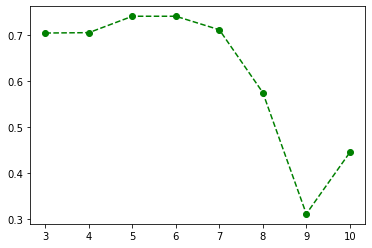

In [20]:
plt.plot(range(3,11),results,'go--')

In [28]:
results

[0.7038703642664883,
 0.7047058309101646,
 0.7403807230597731,
 0.7403646611255721,
 0.71095718129386,
 0.5743097136691352,
 0.31046760160756715,
 0.44405814157098233]